In [64]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt

# 1 (b) Newton's Algorithm - Backtracking Line Search

In [71]:
def rosen(x, a=1, b=100):
    """
    Rosenbrock function definition
    """
    return (a-x[0])**2 + b*((x[1]-x[0]**2)**2)

In [72]:
def rosen_grad(x, a=1, b=100):
    """
    Gradient for Rosenbrock function
    """
    return np.array([2*(x[0]-a)-4*b*x[0]*(x[1]-x[0]**2),
                    2*b*(x[1]-x[0]**2)]).transpose()

In [73]:
def rosen_hess(x, a=1, b=100):
    """
    Hessian for Rosenbrock function
    """
    return np.array([[12*b*x[0]**2 - 4*b*x[1] + 2, -4*b*x[0]],
                     [-4*b*x[0], 2*b]])

In [89]:
def newton(initial_guess, conc_ratio=0.5, c=10e-4, init_alpha=1.0, stop=10e-8, max_iterations=100):
    """
    Newton's Algorithm
    """
    x = initial_guess
    error = 1.0
    i = 0
    true_x = np.array([1.0, 1.0])
    iterates = []
    alphas = []
    rosens = []
    rel_error = []
    while i<max_iterations and error > stop:
        alpha = init_alpha
        grad = rosen_grad(x)
        p = -1 * np.matmul(np.linalg.inv(rosen_hess(x)), grad)
        f = rosen(x)
        while rosen(x+alpha*p) > f + c*alpha*np.matmul(grad.transpose(),p):
            alpha = alpha * conc_ratio
        error = np.linalg.norm(alpha*p) / np.linalg.norm(x)
        iterates.append(x)
        alphas.append(alpha)
        rosens.append(f)
        rel_error.append(np.linalg.norm(true_x - x) / np.linalg.norm(true_x))
        x = x+alpha*p
        i += 1
    
    return iterates, alphas, rosens, rel_error              
        
    

In [92]:
def plot_newton_output(iterates, alphas, rel_error, rosens):
    """
    Plot required values
    """
    # Alpha
    x_axis = [i for i in range(len(iterates))]
    plt.plot(x_axis, alphas)
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Alpha")
    plt.show()

    # Iterates
    plt.plot(x_axis, rel_error)
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Relative Error")
    plt.show()

    # Objective Function
    plt.plot(x_axis, rosens)
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function")
    plt.show()
    

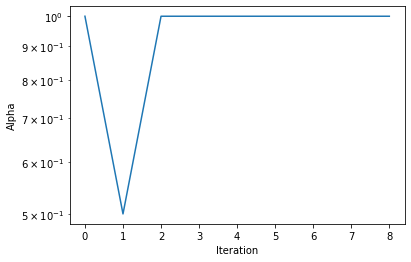

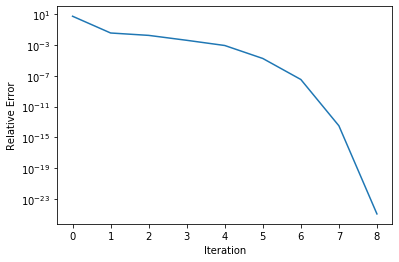

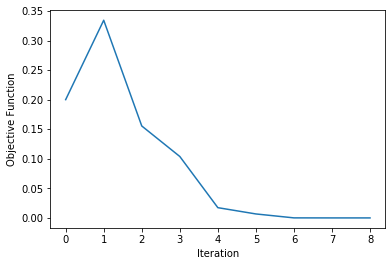

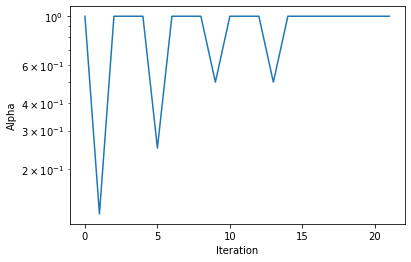

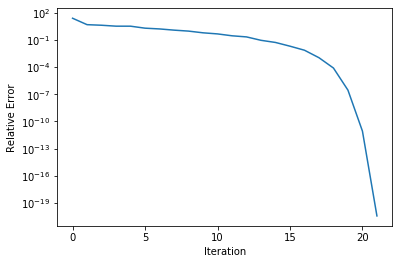

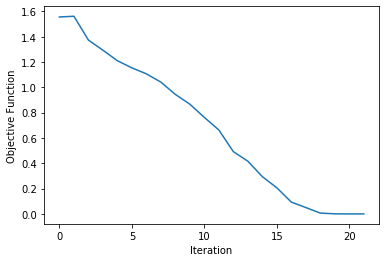

In [93]:
# Run Newton's Method
initial_guess_1 = np.array([1.2, 1.2]).transpose()
initial_guess_2 = np.array([-1.2, 1.0]).transpose()

iterates, alphas, rosens, rel_error = newton(initial_guess_1)
plot_newton_output(iterates, alphas, rosens, rel_error)

iterates, alphas, rosens, rel_error = newton(initial_guess_2)
plot_newton_output(iterates, alphas, rosens, rel_error)


In [70]:
# Run built-in optimizer
initial_guess = np.array([1.1, 1.1]).transpose()
sc.minimize(rosen, initial_guess, method='TNC')

# Plots

     fun: 4.339218213073931e-11
     jac: array([-1.67289127e-06, -2.74322021e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 17
     nit: 8
  status: 1
 success: True
       x: array([0.99999342, 0.99998681])

# 4 (a) BFGS Method